<div style="background-color: Black;  padding: 10px; border-radius: 10px; text-align: center;">
  <span style="color: white; font-size: 35px; font-weight: bold;">
      Digit Recognizer Using CNN - Accuracy 98.76 %
</div>


## **By/Eng.Ahmed Almohamdy**

orignal Notebook link : https://www.kaggle.com/code/ahmedalmohamdy/digit-recognizer-using-cnn-accuracy-98-76

* **1. Data preparation**
    * 1.1 Load data
    * 1.2 Check for null and missing values
    * 1.3 Normalization
    * 1.4 Reshape
    * 1.5 Label encoding
    * 1.6 Split training and valdiation set
* **2. CNN**
    * 2.1 Define the model
    * 2.2 Set the optimizer
    * 2.3 Data Augmentation
* **3. Evaluate the model**
    * 3.1 Training and validation curves
    * 3.2 Confusion matrix
* **4.Prediction and submition**
    * 4.1 Predict and Submit results

<div style="background-color: Green;  padding: 10px; border-radius: 10px; text-align: center;">
  <span style="color: white; font-size: 15px; font-weight: bold;">
      Importing
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(3)  # To Produce same random values each run Time

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D , BatchNormalization
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

<div style="background-color: Green;  padding: 10px; border-radius: 10px; text-align: center;">
  <span style="color: white; font-size: 15px; font-weight: bold;">
      Data Preparation
</div>


# 1. Data preparation
## 1.1 Load data

In [2]:
# Load the data
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [3]:
train.shape

(42000, 785)

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## check missing Data

In [6]:
train.isna().sum().sum()

0

In [7]:
X_train = train.drop(columns=['label'])
Y_train = train['label']
del train

<BarContainer object of 10 artists>

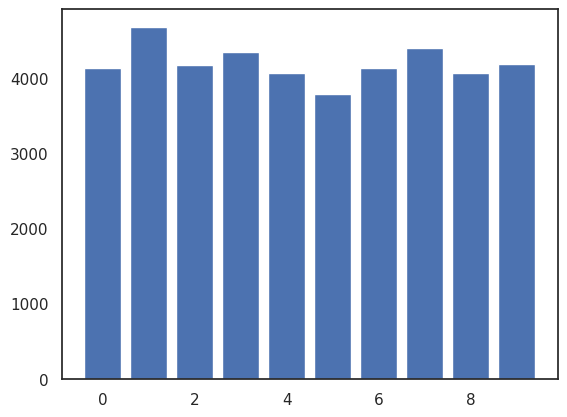

In [8]:
plt.bar( x= Y_train.value_counts().keys() , height = Y_train.value_counts().values)

## 1.3 Normalization

In [9]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

## 1.4 Reshape

In [10]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , chanal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

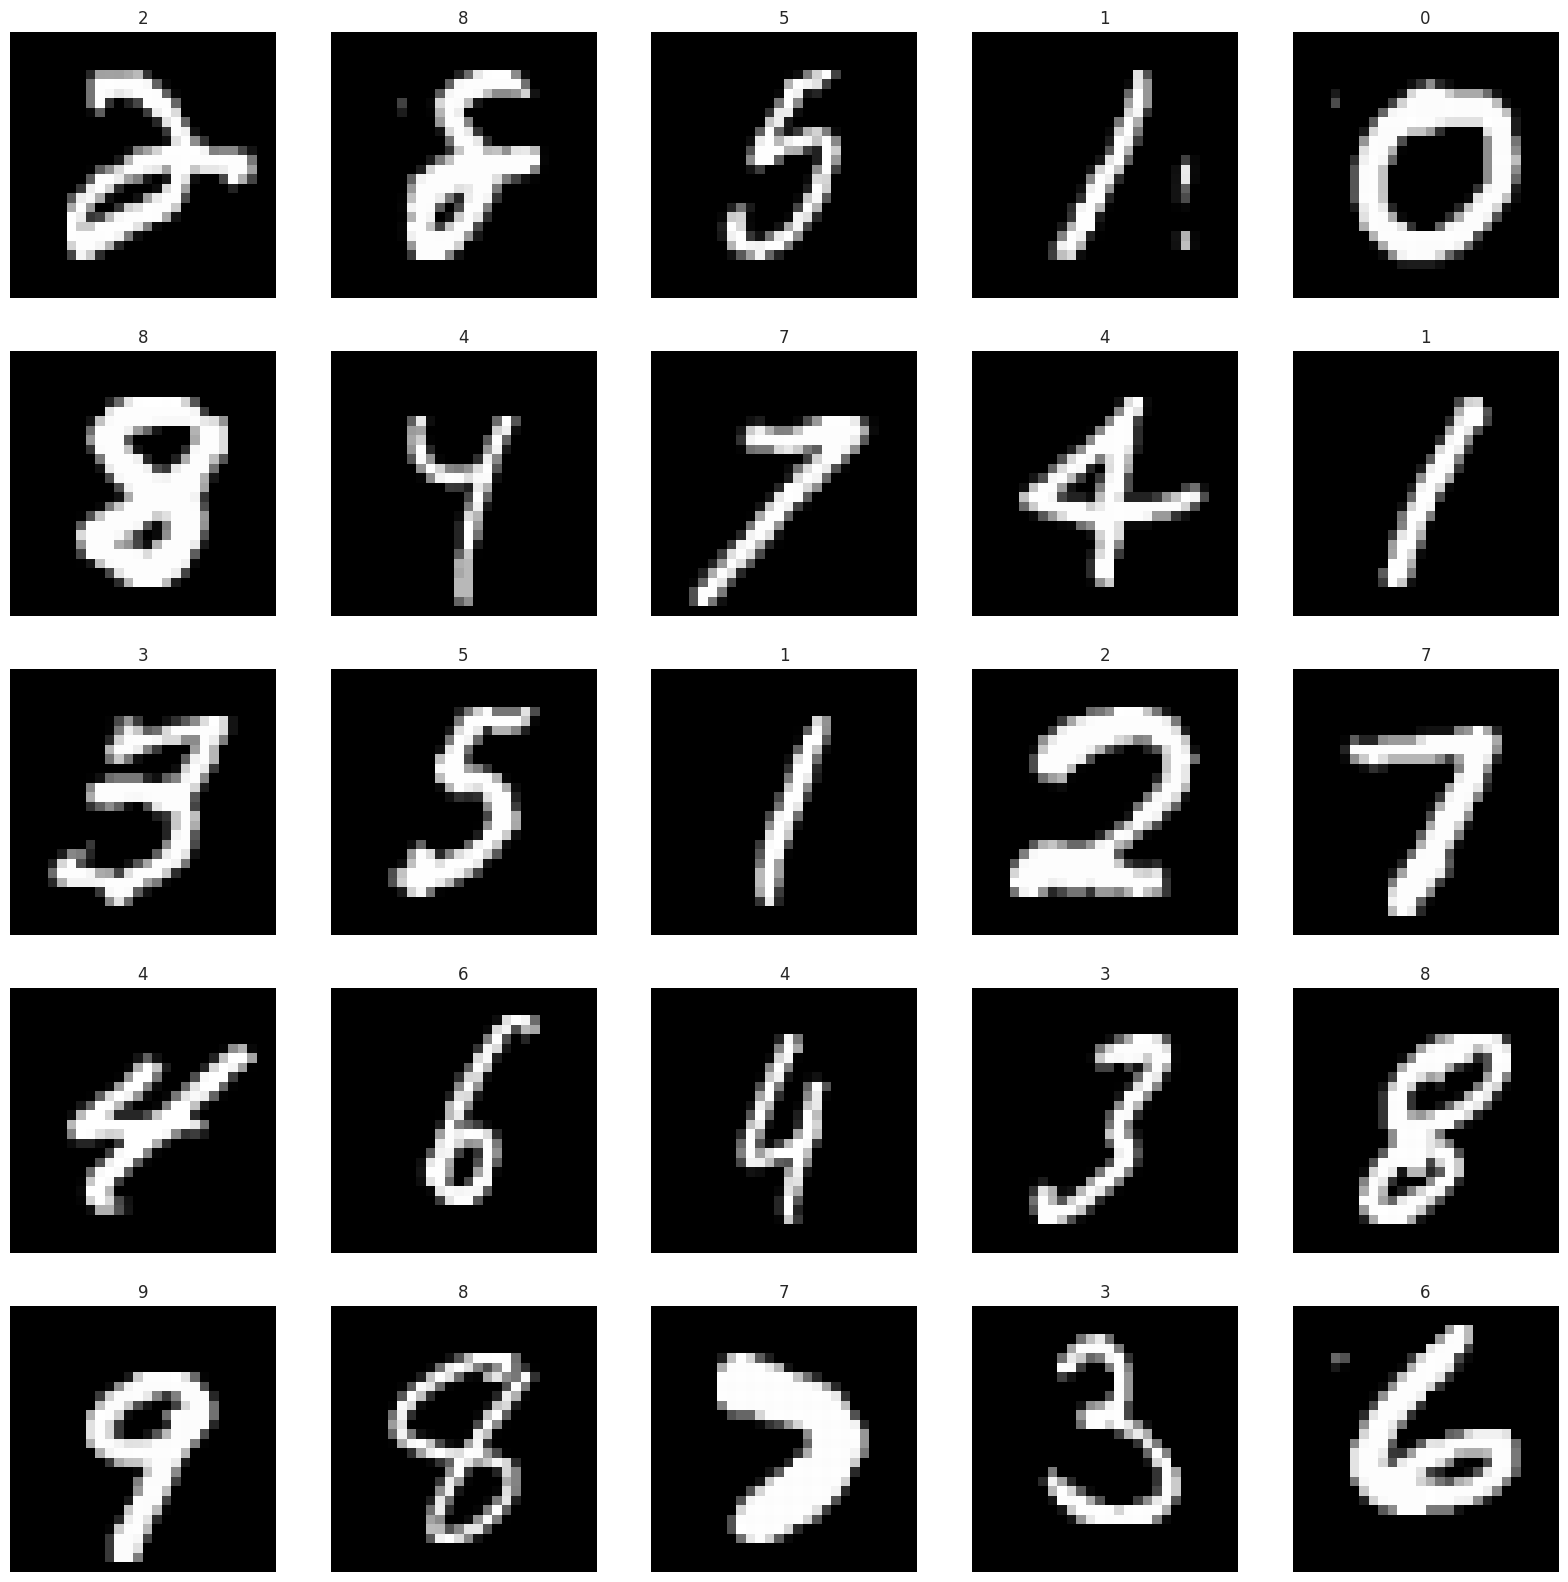

In [11]:
fig , ax = plt.subplots(5,5 , figsize=(20,20))
ax = ax.flatten()
i=0
r_nums = np.random.randint(0,len(X_train),25)
for n in  r_nums:
    ax[i].imshow(X_train[n] , cmap = 'gray')
    ax[i].axis('off')
    ax[i].grid(False)
    ax[i].set_title(Y_train[n])
    i+=1

## 1.5 Label encoding

In [12]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

## 1.6 Split training and valdiation set 

In [13]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=2,stratify=Y_train)

In [14]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(33600, 28, 28, 1)
(33600, 10)
(8400, 28, 28, 1)
(8400, 10)


<div style="background-color: Green;  padding: 10px; border-radius: 10px; text-align: center;">
  <span style="color: white; font-size: 15px; font-weight: bold;">
      CNN Model
</div>


# 2. CNN
## 2.1 Define the model

In [15]:
# Set the CNN model 

model = Sequential([

        Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)),
        Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.25),


        Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),
        Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),
        BatchNormalization()  ,  
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.25),


        Flatten(),
        Dense(256, activation = "relu"),
        Dropout(0.5),
        Dense(10, activation = "softmax"),
    ])
    
    
# categorical_crossentropy with one hot encoded labels    
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary()) 


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 887,914 (3.39 MB)

 Trainable params: 887,722 (3.39 MB)

 Non-trainable params: 192 (768.00 B)

None


<div style="background-color: Green;  padding: 10px; border-radius: 10px; text-align: center;">
  <span style="color: white; font-size: 15px; font-weight: bold;">
      Data Augmentation
</div>


## 2.3 Data augmentation 

In [16]:
datagen = ImageDataGenerator(
        rotation_range=10,      # randomly rotate images in the range 5 degrees
        zoom_range = 0.1,       # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
)

datagen.fit(X_train)

In [17]:
X_train.shape

(33600, 28, 28, 1)

In [18]:
# Fit the model
batch_size=128
epochs = 12

history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size )

Epoch 1/12


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728693836.987656      64 service.cc:145] XLA service 0x7c5a24003a90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728693836.987740      64 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1728693844.954288      64 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


262/262 - 32s - 121ms/step - accuracy: 0.8067 - loss: 0.6314 - val_accuracy: 0.5306 - val_loss: 1.7941
Epoch 2/12


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


262/262 - 0s - 2ms/step - accuracy: 0.9688 - loss: 0.1427 - val_accuracy: 0.5277 - val_loss: 1.8086
Epoch 3/12
262/262 - 14s - 52ms/step - accuracy: 0.9448 - loss: 0.1818 - val_accuracy: 0.9779 - val_loss: 0.0662
Epoch 4/12
262/262 - 0s - 2ms/step - accuracy: 0.9688 - loss: 0.1028 - val_accuracy: 0.9765 - val_loss: 0.0711
Epoch 5/12
262/262 - 14s - 52ms/step - accuracy: 0.9601 - loss: 0.1399 - val_accuracy: 0.9682 - val_loss: 0.1002
Epoch 6/12
262/262 - 0s - 2ms/step - accuracy: 0.9688 - loss: 0.0859 - val_accuracy: 0.9640 - val_loss: 0.1120
Epoch 7/12
262/262 - 14s - 52ms/step - accuracy: 0.9665 - loss: 0.1136 - val_accuracy: 0.9867 - val_loss: 0.0449
Epoch 8/12
262/262 - 0s - 2ms/step - accuracy: 0.9453 - loss: 0.1743 - val_accuracy: 0.9871 - val_loss: 0.0446
Epoch 9/12
262/262 - 14s - 52ms/step - accuracy: 0.9711 - loss: 0.0979 - val_accuracy: 0.9898 - val_loss: 0.0302
Epoch 10/12
262/262 - 0s - 2ms/step - accuracy: 0.9922 - loss: 0.0283 - val_accuracy: 0.9892 - val_loss: 0.0300
Epo

<div style="background-color: Green;  padding: 10px; border-radius: 10px; text-align: center;">
  <span style="color: white; font-size: 20px; font-weight: bold;">
      Evaluting
</div>


# 3. Evaluate the model
## 3.1 Training and validation curves

In [19]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

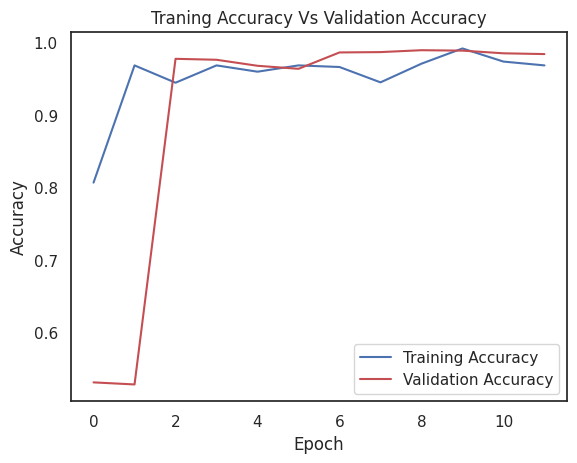

In [20]:
plt.plot(history.history['accuracy'], color = 'b', label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], color = 'r', label = 'Validation Accuracy')
plt.title('Traning Accuracy Vs Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

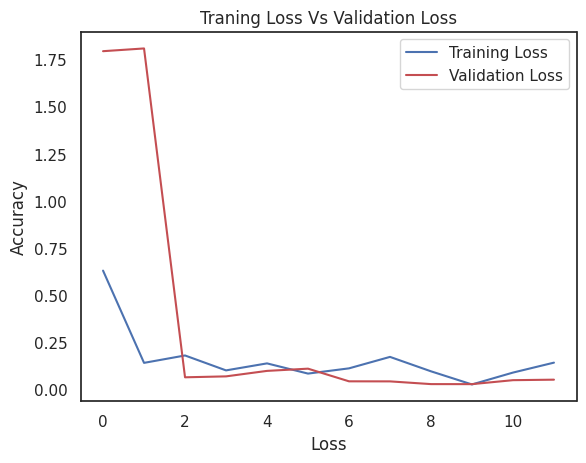

In [21]:
plt.plot(history.history['loss'], color = 'b', label = 'Training Loss')
plt.plot(history.history['val_loss'], color = 'r', label = 'Validation Loss')
plt.title('Traning Loss Vs Validation Loss')
plt.legend()
plt.xlabel('Loss')
plt.ylabel('Accuracy')
plt.show()

## 3.2 Confusion matrix

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


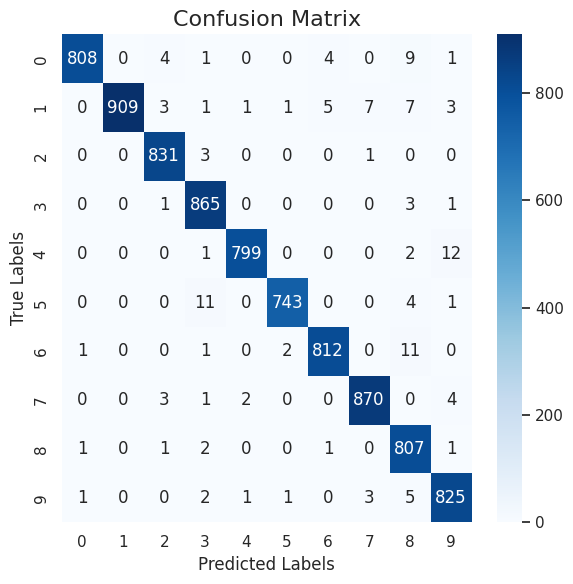

In [22]:
def plot_confusion_matrix(true_labels, pred_labels, class_names):
    
    cm = confusion_matrix(true_labels, pred_labels)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    
    plt.title("Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted Labels", fontsize=12)
    plt.ylabel("True Labels", fontsize=12)
    plt.tight_layout()
    plt.show()
    
# -------------------------------------------------------------

y_val_pred = model.predict(X_val)
class_names = list(np.arange(0, 10))
pred_labels = np.argmax(y_val_pred, axis=1)  
plot_confusion_matrix(np.argmax(Y_val, axis = 1), pred_labels, class_names)

<div style="background-color: Green;  padding: 10px; border-radius: 10px; text-align: center;">
  <span style="color: white; font-size: 15px; font-weight: bold;">
      Predicting and Submission
</div>


In [23]:
# predict results
results = model.predict(test)
results = np.argmax(results,axis = 1)
results.shape

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(28000,)

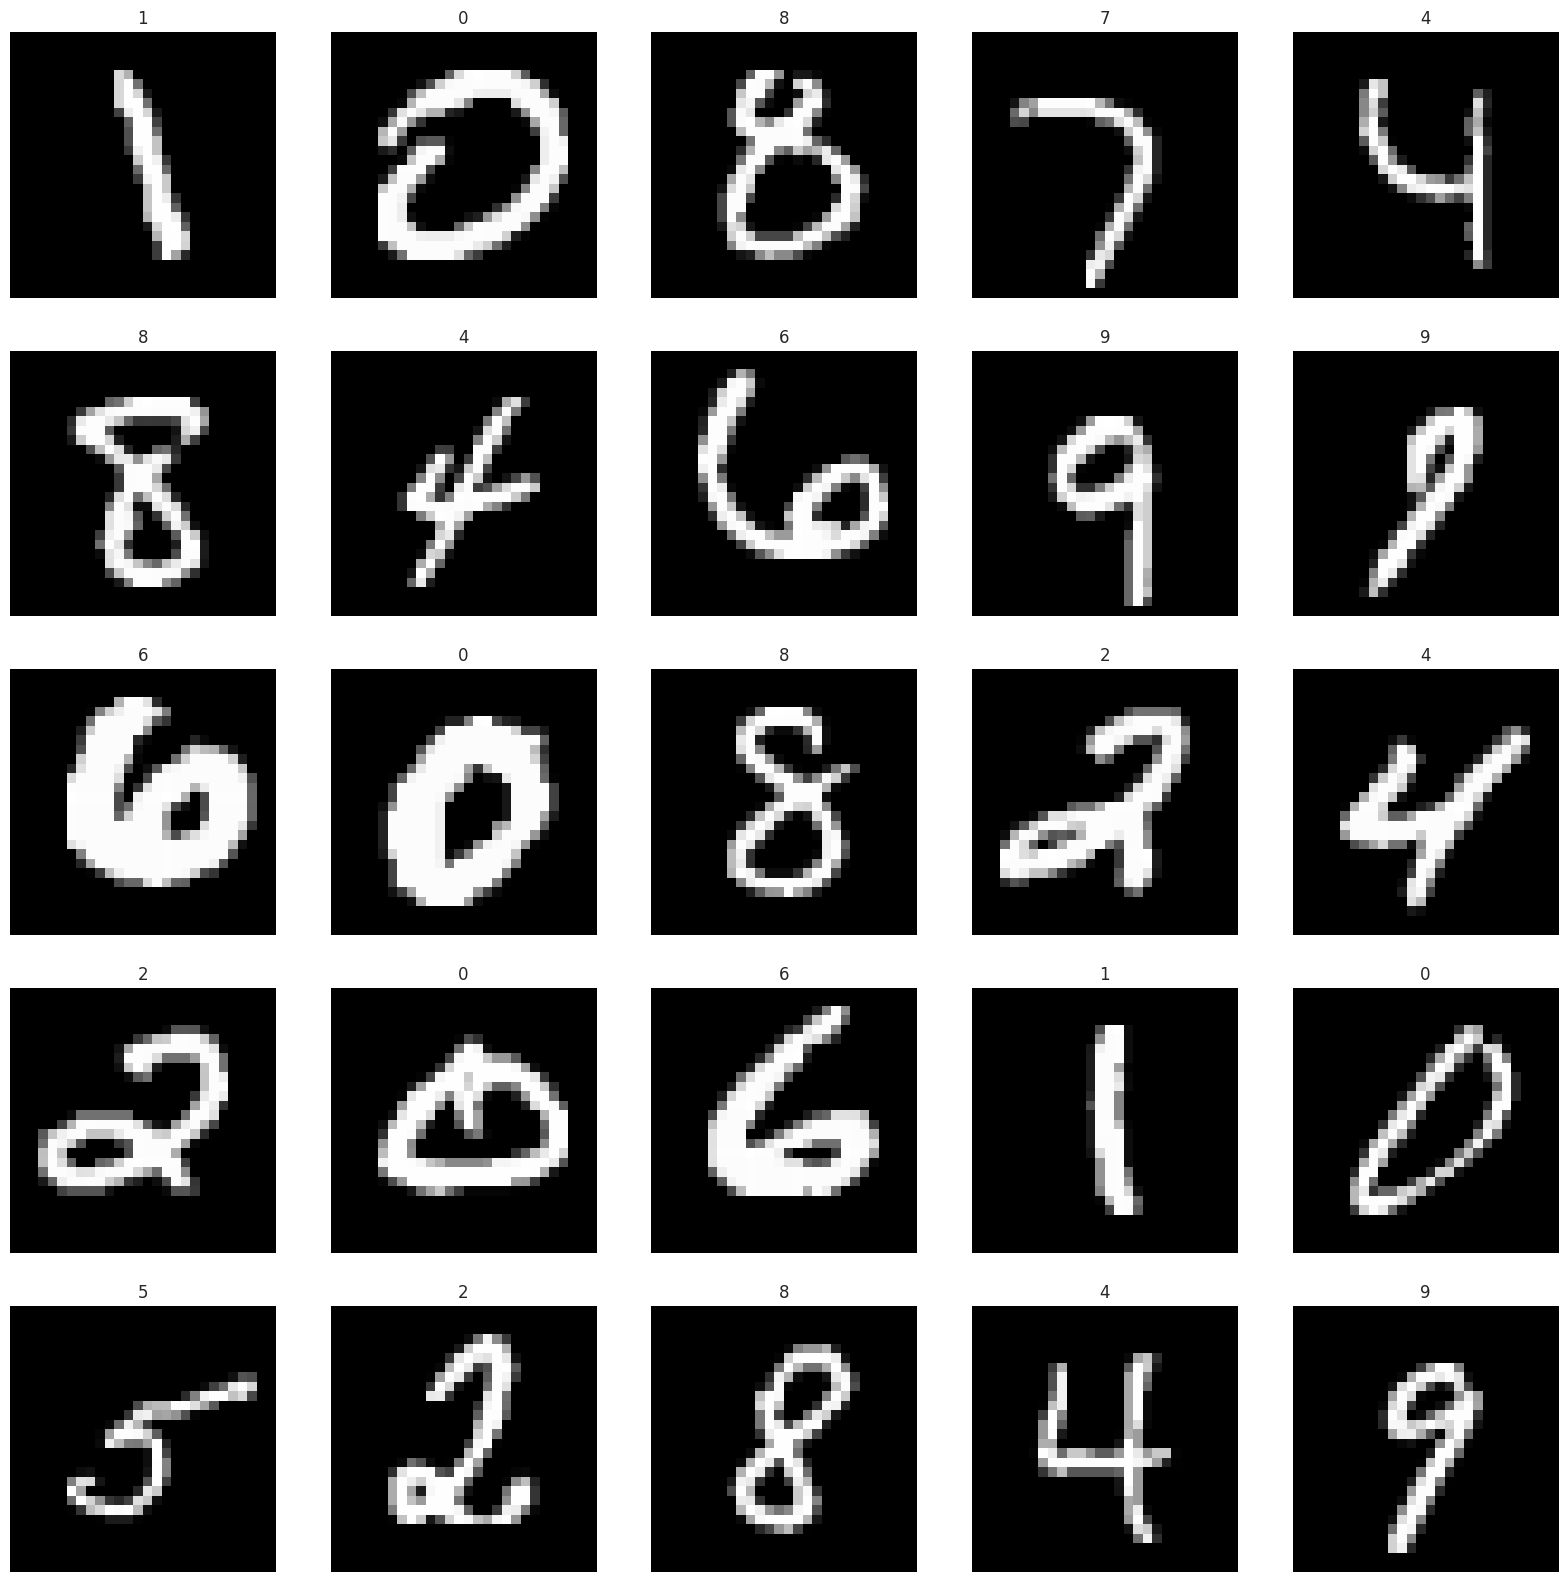

In [24]:
fig , ax = plt.subplots(5,5, figsize=(20,20))
ax = ax.flatten()
i=0
r_nums = np.random.randint(0,len(test), 25)
for n in  r_nums:
    ax[i].imshow(test[n] , cmap = 'gray')
    ax[i].axis('off')
    ax[i].grid(False)
    ax[i].set_title(results[n])
    i+=1

In [25]:
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
submission['Label'] = results
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [26]:
submission.to_csv("/kaggle/working/submission.csv",index=False)

In [27]:
model.save('model.h5')